
# Diodenkennlinie Simulation

Dieses Jupyter Notebook simuliert die Kennlinie einer Diode basierend auf der Shockley-Diodengleichung. Die Kurve wird schrittweise gezeichnet, damit du den Verlauf verfolgen kannst. Du kannst die Anzahl der Messpunkte, die Maximalspannung und andere Parameter anpassen. Experimentiere mit dem Code und ändere die Werte!

---

## 1. Einrichtung und Parameter

Importiere die notwendigen Bibliotheken und definiere die Parameter. Du kannst diese Werte nach Belieben ändern:

- `num_points`: Anzahl der Messpunkte (z. B. 50, 100, 200).
- `max_voltage`: Maximale Spannung in Volt (z. B. 2.0, 5.0).
- `Is`: Sättigungsstrom der Diode (typisch 1e-9 A für Silizium).
- `n`: Ideality-Faktor (typisch zwischen 1 und 2).
- `Vt`: Thermische Spannung (ca. 0.026 V bei Raumtemperatur).
- `R_series`: Serienwiderstand in Ohm (z. B. 100 Ω).
- `delay`: Verzögerung zwischen den Schritten in Sekunden (z. B. 0.1).

Führe die folgende Zelle aus, um die Parameter zu setzen.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Anpassbare Parameter
num_points = 200  # Anzahl der Messpunkte
max_voltage = 2.0  # Maximale Spannung in Volt (kann negativ sein für Sperrrichtung)
Is = 1e-5  # Sättigungsstrom (A)
n = 1.5  # Ideality-Faktor
Vt = 0.026  # Thermische Spannung (V)
R_series = 100  # Serienwiderstand (Ω)

# Spannungsbereich und Listen initialisieren (erweitert für Sperrrichtung)
input_voltages = np.linspace(-1.0, max_voltage, num_points)  # Bereich von -1 V bis max_voltage
voltages = []  # Spannung über der Diode
currents = []  # Strom durch die Diode (in mA)

## 2. Simulation der Diodenkennlinie

Hier simulieren wir die Diodenkennlinie schrittweise. Die Spannung über der Diode (\( V_D \)) wird iterativ berechnet. Du kannst die Iterationsmethode anpassen, um genauere Ergebnisse zu erhalten.

Führe die folgende Zelle aus, um die Simulation durchzuführen.

In [7]:
# Simulation
for vin in input_voltages:
    v_diode = vin  # Startwert
    for _ in range(10):  # Einfache Iteration
        i_diode = Is * (np.exp(v_diode / (n * Vt)) - 1)  # Shockley-Gleichung
        v_diode_new = vin - i_diode * R_series
        v_diode = v_diode_new  # Aktualisiere v_diode ohne Negative-Wert-Prüfung
    voltages.append(v_diode)
    currents.append(i_diode * 1000)  # Umrechnung in mA

# Erstelle eine Tabelle mit den simulierten Werten
data = {
    "Eingangsspannung (V)": [f"{vin:.4f}" for vin in input_voltages[:10]],  # Erste 10 Eingangsspannungen
    "Spannung über der Diode (V)": [f"{v:.4f}" for v in voltages[:10]],
    "Strom (mA)": [f"{i:.4f}" for i in currents[:10]]
}
df = pd.DataFrame(data)
display(df)

print("Simulation abgeschlossen.")

,Eingangsspannung (V),Spannung über der Diode (V),Strom (mA)
0,-1.0000,-0.9990,-0.0100
1,-0.9849,-0.9839,-0.0100
2,-0.9698,-0.9688,-0.0100
3,-0.9548,-0.9538,-0.0100
4,-0.9397,-0.9387,-0.0100
5,-0.9246,-0.9236,-0.0100
6,-0.9095,-0.9085,-0.0100
7,-0.8945,-0.8935,-0.0100
8,-0.8794,-0.8784,-0.0100
9,-0.8643,-0.8633,-0.0100


Simulation abgeschlossen.


## 3. Schrittweise Visualisierung

Jetzt zeichnen wir die Diodenkennlinie schrittweise. Die Kurve wird Punkt für Punkt mit der definierten Verzögerung (\`delay\`) gezeichnet. Du kannst die Verzögerung oder das Diagrammformat ändern.

Führe die folgende Zelle aus, um die schrittweise Darstellung zu sehen.

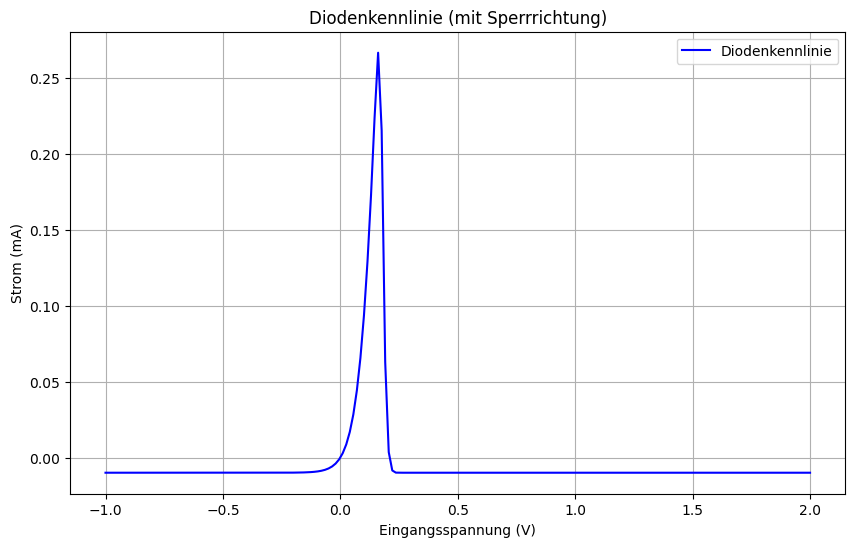

In [8]:
# Visualisierung
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(input_voltages, currents, 'b-', label='Diodenkennlinie')
ax.set_xlabel('Eingangsspannung (V)')
ax.set_ylabel('Strom (mA)')
ax.set_title('Diodenkennlinie (mit Sperrrichtung)')
ax.grid(True)
ax.legend()
plt.show()

## 4. Daten speichern (optional)

Speichere die simulierten Daten in eine CSV-Datei. Du kannst den Dateipfad oder das Format ändern.

Führe die folgende Zelle aus, um die Daten zu speichern.

In [5]:
import csv

with open('diodenkennlinie.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Spannung (V)', 'Strom (mA)'])
    for v, i in zip(voltages, currents):
        writer.writerow([v, i])

print("Daten wurden in 'diodenkennlinie.csv' gespeichert.")

Daten wurden in 'diodenkennlinie.csv' gespeichert.


## 5. Experimentiere!

- Ändere `num_points` oder `max_voltage`, um die Auflösung oder den Bereich zu ändern.
- Passe `Is`, `n`, oder `R_series` an, um verschiedene Dioden oder Schaltungen zu simulieren.
- Ändere `delay`, um die Geschwindigkeit der schrittweisen Darstellung zu variieren (z. B. 0.05 für schneller, 0.2 für langsamer).
- Ersetze die Iterationsmethode durch eine präzisere Berechnung (z. B. Newton-Raphson).
- Füge eine Anzeige der aktuellen Werte (z. B. mit `print`) während der schrittweisen Zeichnung hinzu.

Versuche es aus und beobachte die Veränderungen!